In [4]:
import zipfile

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:10<00:00, 143MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


In [7]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [10]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


- Images are now stored in the form of numpy arrays
- Every value is in the range (0, 255)
- We want to normalize the intensity values

In [11]:
# Normalize

def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

In [12]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# First model

model1 = Sequential()

model1.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [15]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history1 = model1.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 95s 137ms/step - loss: 0.6689 - accuracy: 0.5800 - val_loss: 0.6074 - val_accuracy: 0.6836
Epoch 2/10
625/625 [==============================] - 87s 138ms/step - loss: 0.5687 - accuracy: 0.7048 - val_loss: 0.5542 - val_accuracy: 0.7198
Epoch 3/10
625/625 [==============================] - 89s 142ms/step - loss: 0.4352 - accuracy: 0.7959 - val_loss: 0.6253 - val_accuracy: 0.7128
Epoch 4/10
625/625 [==============================] - 88s 141ms/step - loss: 0.2408 - accuracy: 0.8968 - val_loss: 1.0343 - val_accuracy: 0.7102
Epoch 5/10
625/625 [==============================] - 86s 137ms/step - loss: 0.1136 - accuracy: 0.9559 - val_loss: 1.2593 - val_accuracy: 0.7078
Epoch 6/10
625/625 [==============================] - 87s 138ms/step - loss: 0.0793 - accuracy: 0.9725 - val_loss: 1.3614 - val_accuracy: 0.7064
Epoch 7/10
625/625 [==============================] - 86s 137ms/step - loss: 0.0619 - accuracy: 0.9794 - val_loss: 1.5134 - val_ac

In [17]:
import matplotlib.pyplot as plt

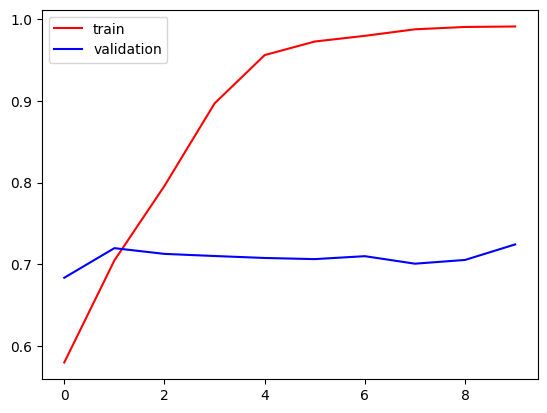

In [18]:
plt.plot(history1.history['accuracy'], color='red', label='train')
plt.plot(history1.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

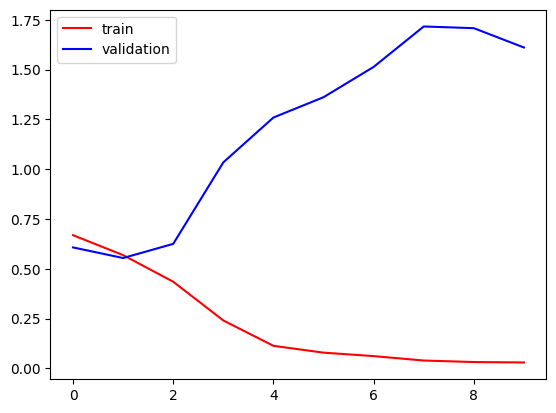

In [19]:
plt.plot(history1.history['loss'], color='red', label='train')
plt.plot(history1.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

- The model is clearly overfitting. Apply deep learning techniques that you have learnt so far (dropout, batch normalization, early stopping, model checkpointing, etc.) to improve the model performance

In [28]:
from tensorflow.keras.layers import BatchNormalization

In [29]:
# Second model

model2 = Sequential()
model2.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)       

In [31]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history2 = model2.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 95s 145ms/step - loss: 0.7121 - accuracy: 0.5680 - val_loss: 1.1895 - val_accuracy: 0.5132
Epoch 2/10
625/625 [==============================] - 89s 142ms/step - loss: 0.6490 - accuracy: 0.6179 - val_loss: 0.8892 - val_accuracy: 0.5186
Epoch 3/10
625/625 [==============================] - 88s 141ms/step - loss: 0.6119 - accuracy: 0.6510 - val_loss: 0.6198 - val_accuracy: 0.6634
Epoch 4/10
625/625 [==============================] - 89s 141ms/step - loss: 0.5769 - accuracy: 0.6896 - val_loss: 0.5926 - val_accuracy: 0.6970
Epoch 5/10
625/625 [==============================] - 91s 144ms/step - loss: 0.6024 - accuracy: 0.6723 - val_loss: 0.5852 - val_accuracy: 0.6932
Epoch 6/10
625/625 [==============================] - 87s 138ms/step - loss: 0.6195 - accuracy: 0.6532 - val_loss: 0.8275 - val_accuracy: 0.5088
Epoch 7/10
625/625 [==============================] - 87s 138ms/step - loss: 0.6084 - accuracy: 0.6679 - val_loss: 0.7527 - val_ac

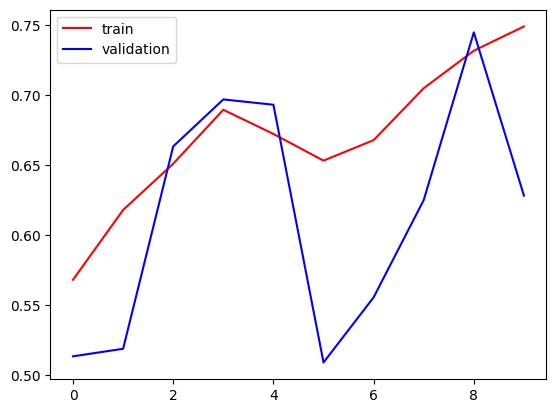

In [33]:
plt.plot(history2.history['accuracy'], color='red', label='train')
plt.plot(history2.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

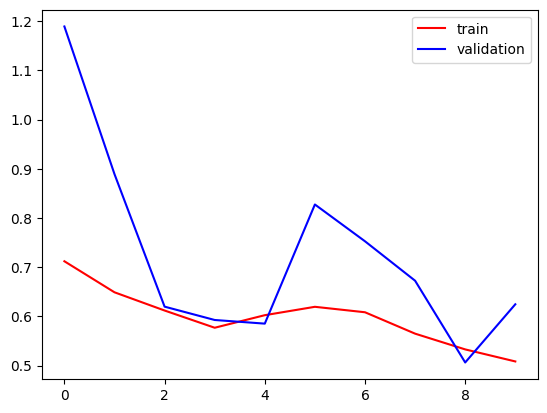

In [34]:
plt.plot(history2.history['loss'], color='red', label='train')
plt.plot(history2.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()